In [14]:
# Import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')

In [7]:
# Get only opposing proximities
red_zone_qb_proximity_opposing = red_zone_qb_proximity[red_zone_qb_proximity['matchupOpposing'] == 1]

In [27]:
red_zone_pressure = red_zone_qb_proximity_opposing[['gameId', 'playId', 'frameId', 'distance']].groupby(['gameId', 'playId', 'frameId']).min().reset_index()
red_zone_pressure

,gameId,playId,frameId,distance
0,2021090900,410,1,5.680220
1,2021090900,410,2,5.650142
2,2021090900,410,3,5.630142
3,2021090900,410,4,5.610009
4,2021090900,410,5,5.570009
...,...,...,...,...
42735,2021110100,4433,54,0.655515
42736,2021110100,4433,55,0.702282
42737,2021110100,4433,56,0.774919
42738,2021110100,4433,57,0.838153


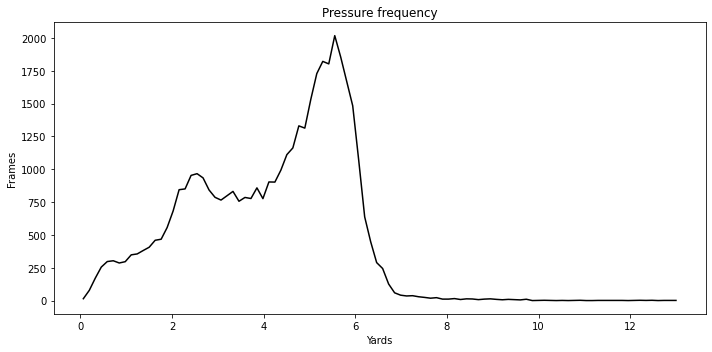

In [32]:
plt.rcParams["figure.figsize"] = [10, 5]
y, binEdges = np.histogram(red_zone_pressure['distance'], bins=100)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.xlabel('Yards')
plt.ylabel('Frames')
plt.title('Pressure frequency')
plt.show()